# Decision tree classifier

## Load Iris dataset

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
aa = iris.feature_names

print(aa[1])

sepal width (cm)


In [4]:
aa = iris.feature_names

string_a = ', '.join(aa)
print(string_a)
#print(iris.DESCR)
#print(iris.filename)
#print(iris)

sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)


In [5]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [7]:
# train-test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
tree_clf = DecisionTreeClassifier(max_depth=2)

# training
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [9]:
# evaluation
test_performance = tree_clf.score(X_test, y_test)
print(test_performance)

0.9333333333333333


### Decision tree visualization

In [10]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [40, 38, 42]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.65\ngini = 0.499\nsamples = 80\nvalue = [0, 38, 42]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.139\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]')]

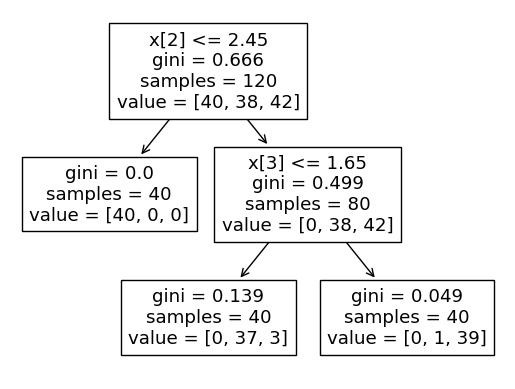

In [11]:
plot_tree(tree_clf)

### Feature importance

In [12]:
aa = tree_clf.feature_importances_
bb = zip(iris.feature_names, tree_clf.feature_importances_)
print(type(bb))

<class 'zip'>


In [13]:
for name, score in zip(iris.feature_names, tree_clf.feature_importances_):
    print(name, ': ', score)

print(dict(zip(iris.feature_names, tree_clf.feature_importances_)))

sepal length (cm) :  0.0
sepal width (cm) :  0.0
petal length (cm) :  0.5526921306948919
petal width (cm) :  0.4473078693051083
{'sepal length (cm)': 0.0, 'sepal width (cm)': 0.0, 'petal length (cm)': 0.5526921306948919, 'petal width (cm)': 0.4473078693051083}


In [14]:
import numpy as np

# increasing order
sorted_idx = tree_clf.feature_importances_.argsort()

print(sorted_idx)

#print(iris.feature_names[sorted_idx]) # what's wrong?
print(np.asarray(iris.feature_names)[sorted_idx])

[0 1 3 2]
['sepal length (cm)' 'sepal width (cm)' 'petal width (cm)'
 'petal length (cm)']


In [15]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


<BarContainer object of 4 artists>

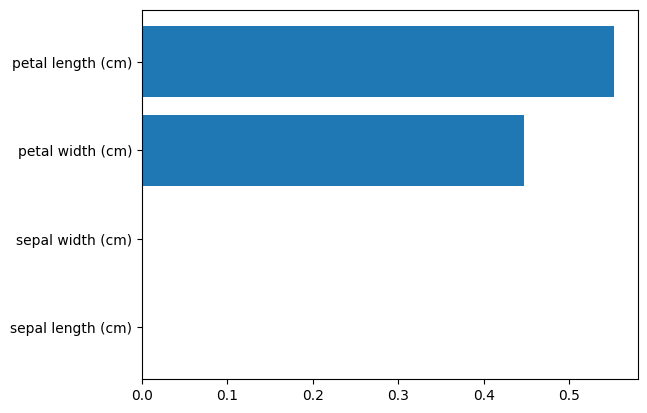

In [16]:
import matplotlib.pyplot as plt

plt.barh(np.asarray(iris.feature_names)[sorted_idx],
         tree_clf.feature_importances_[sorted_idx])

## Decision Boundary

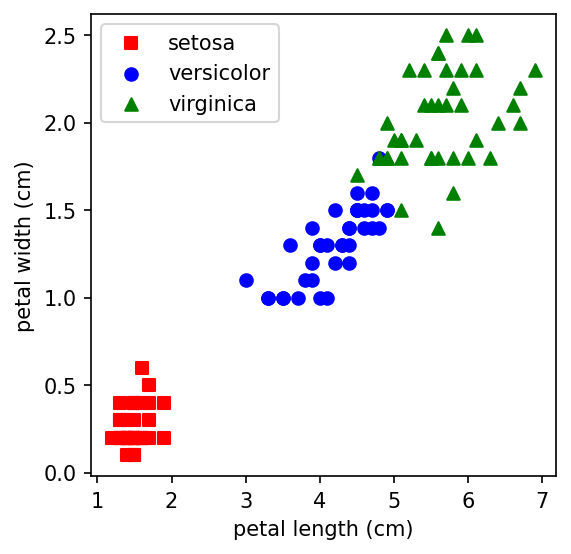

In [17]:
import matplotlib.pyplot as plt

X_y_0 = X_train[y_train==0] # setosa
X_y_1 = X_train[y_train==1] # versicolor
X_y_2 = X_train[y_train==2] # virginica

plt.figure(figsize=(4, 4), dpi=150)

plt.scatter(X_y_0[:, 2], X_y_0[:, 3],
            c='red',label='setosa',marker='s')
plt.scatter(X_y_1[:, 2], X_y_1[:, 3],
            c='blue',label='versicolor',marker='o')
plt.scatter(X_y_2[:, 2], X_y_2[:, 3],
            c='green', label='virginica',marker='^')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend()
plt.show()

In [18]:
aa = np.array([1, 2, 3])
bb = np.array([4, 5, 6])

cc = np.c_[aa.reshape(-1,1), bb.reshape(-1,1)]
print(cc)

[[1 4]
 [2 5]
 [3 6]]


In [19]:
zz_min, zz_max = X_train[:, 2].min() - 0.2, X_train[:, 2].max() + 0.2
ww_min, ww_max = X_train[:, 3].min() - 0.2, X_train[:, 3].max() + 0.2


zz = np.arange(zz_min, zz_max, 0.05)
ww = np.arange(ww_min, ww_max, 0.05)

zz, ww = np.meshgrid(zz, ww, indexing='ij')

print(zz)
print(ww)

[[1.   1.   1.   ... 1.   1.   1.  ]
 [1.05 1.05 1.05 ... 1.05 1.05 1.05]
 [1.1  1.1  1.1  ... 1.1  1.1  1.1 ]
 ...
 [6.95 6.95 6.95 ... 6.95 6.95 6.95]
 [7.   7.   7.   ... 7.   7.   7.  ]
 [7.05 7.05 7.05 ... 7.05 7.05 7.05]]
[[-0.1  -0.05  0.   ...  2.55  2.6   2.65]
 [-0.1  -0.05  0.   ...  2.55  2.6   2.65]
 [-0.1  -0.05  0.   ...  2.55  2.6   2.65]
 ...
 [-0.1  -0.05  0.   ...  2.55  2.6   2.65]
 [-0.1  -0.05  0.   ...  2.55  2.6   2.65]
 [-0.1  -0.05  0.   ...  2.55  2.6   2.65]]


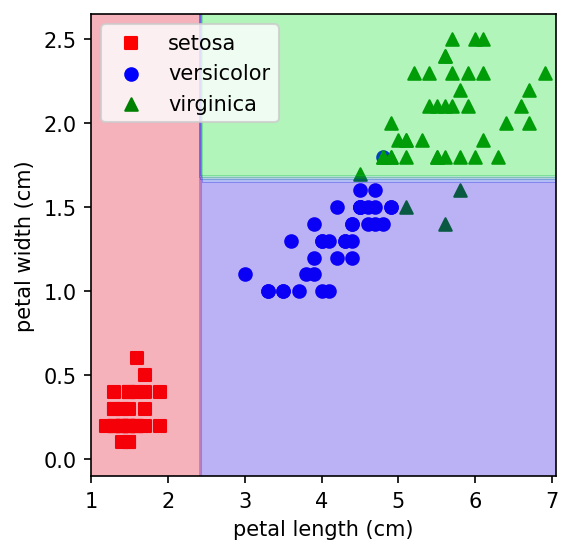

In [20]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

plt.figure(figsize=(4, 4), dpi=150)
plt.scatter(X_y_0[:, 2], X_y_0[:, 3],
            c='red',label='setosa',marker='s')
plt.scatter(X_y_1[:, 2], X_y_1[:, 3],
            c='blue',label='versicolor',marker='o')
plt.scatter(X_y_2[:, 2], X_y_2[:, 3],
            c='green', label='virginica',marker='^')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.legend()

# Draw a decision boundary
colors = [(1, 0, 0), (0, 0, 1), (0, 1, 0)]

zz_min, zz_max = X_train[:, 2].min() - 0.2, X_train[:, 2].max() + 0.2
ww_min, ww_max = X_train[:, 3].min() - 0.2, X_train[:, 3].max() + 0.2

# xx: sepal length, yy: sepal width, ww: petal width, zz: petal length
zz, ww = np.meshgrid(np.arange(zz_min, zz_max, 0.05),
                     np.arange(ww_min, ww_max, 0.05),indexing='ij')
xx = np.zeros_like(zz)
yy = np.zeros_like(zz)

Z = tree_clf.predict(np.c_[xx.reshape(-1, 1),
                           yy.reshape(-1, 1),
                           zz.reshape(-1, 1),
                           ww.reshape(-1, 1)])

Z = Z.reshape(zz.shape)

plt.contourf(zz, ww, Z,
             cmap=LinearSegmentedColormap.from_list('rgb', colors),
             alpha=0.3)
plt.show()